In [11]:
from keras.models import load_model
from keras import models
from keras import layers
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
model = load_model('cats_vs_dogs_small_2.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_______________________________________

In [5]:
img_path = 'C:/Python/keras_training/dogs-vs-cats/dogs-vs-cats_small/test/cats/cat.1700.jpg'

(1, 150, 150, 3)


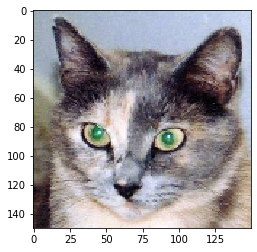

In [9]:
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255.
print(img_tensor.shape)
plt.imshow(img_tensor[0]);

In [14]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [15]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


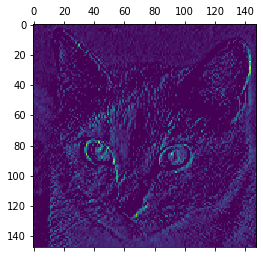

In [30]:
plt.matshow(first_layer_activation[0,:,:,10],cmap='viridis');

C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


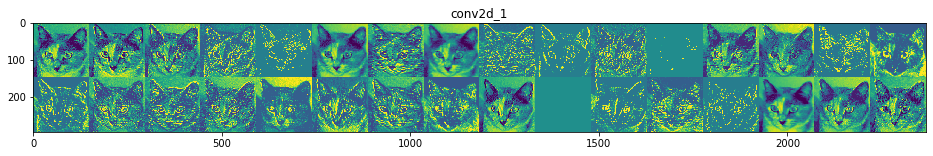

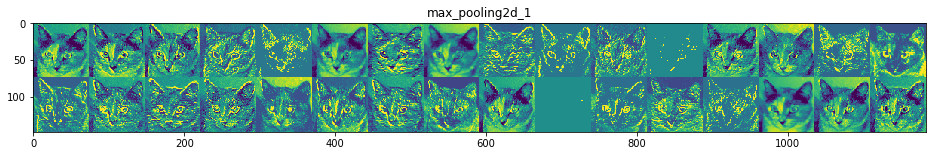

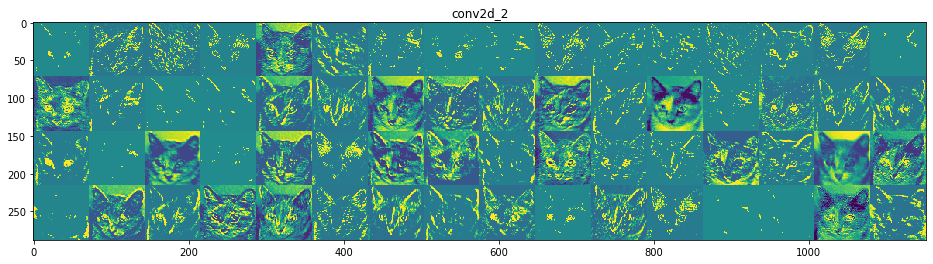

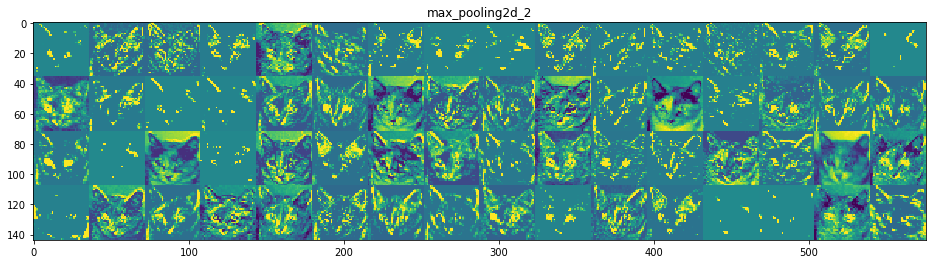

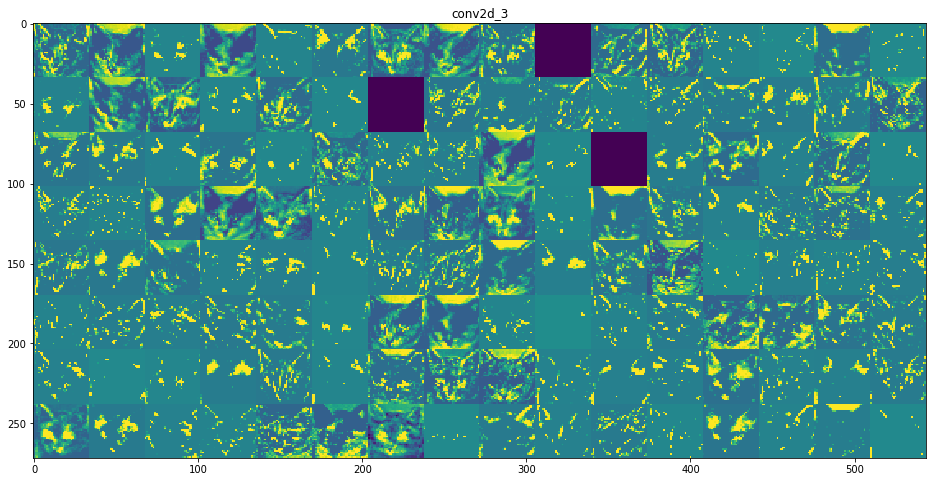

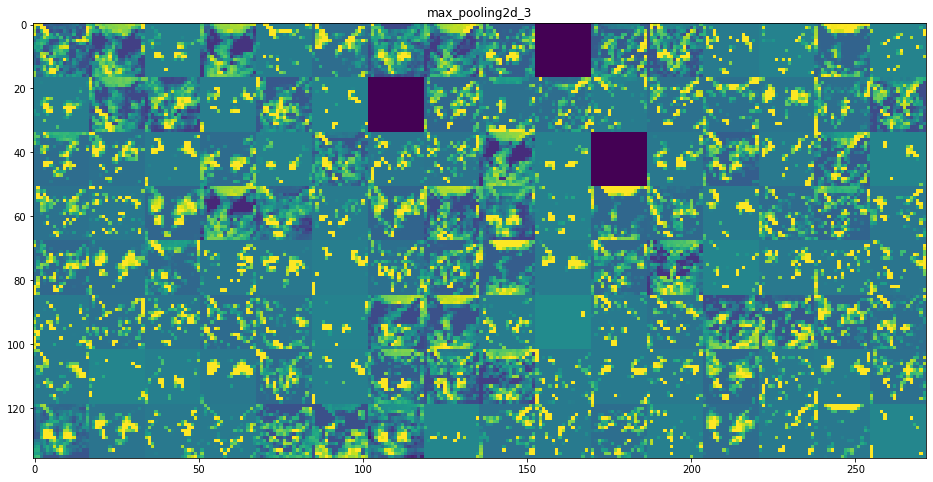

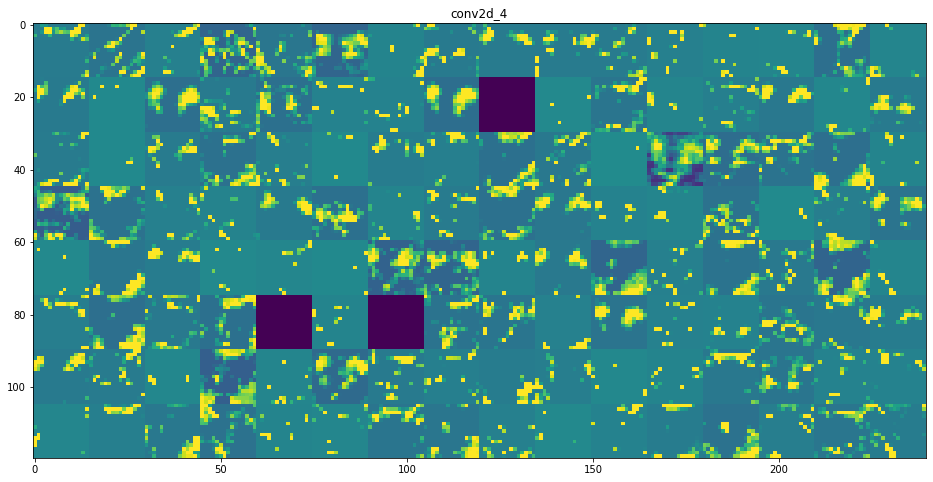

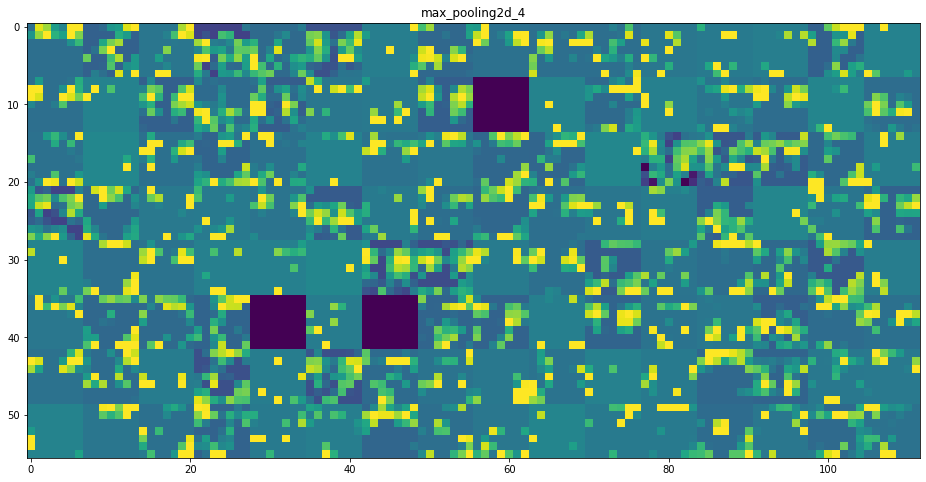

In [31]:
layers_names = []
for layer in model.layers[:8]:
    layers_names.append(layer.name)
    
images_per_row = 16
for layer_name, layer_activation in zip(layers_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            chanel_image = layer_activation[0,:,:,col * images_per_row + row]
            chanel_image -= chanel_image.mean()
            chanel_image /= chanel_image.std()
            chanel_image *= 64
            chanel_image += 128
            chanel_image = np.clip(chanel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = chanel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')